## DBSCAN Practice

We're familiar with DBSCAN. Now, let's practice it!

Let's work with the [NHL data](https://github.com/josephofiowa/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

In [32]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load our data

Feel free to also do basic EDA. At least check the head()!

In [26]:
URL = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
nhl = pd.read_table(URL, names=['Team','PTS','Rank','TOI','GF','GA','GF60','GA60','GF%','SF','SA','SF60','SA60','SF%','FF','FA','FF60','FA60','FF%','CF','CA','CF60','CA60','CF%','Sh%','Sv%','PDO','PIM'],sep=',')
nhl = nhl[1:]
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
1,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58,52.5,10.34,93.03,1034,1269
2,Vancouver11,117,1,2056:14:00,94,72,2.74,2.1,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
3,San Jose10,113,1,1929:54:00,90,68,2.8,2.11,57,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
4,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
5,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51,2085,1880,61,55,52.6,7.98,93.36,1013,1049


In [107]:
nhl.TOI = nhl.TOI.str.replace('(\:.*)','')

## Set up our X

Let's cluster on all features EXCEPT team, rank, and points.

(Bonus idea: make rank be our y category if we want to engage in additional clustering evaluation.)

In [110]:
# identify target and features
features = nhl.columns.drop(['Team','PTS','Rank'])

X = nhl[features]
y = nhl.Rank

## Scatter plot EDA

Check two scatter plots. Make at least one of them be points vs GF. Do we obtain a general idea of how many clusters we should witness?

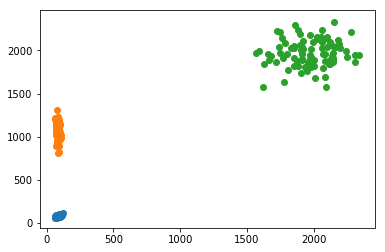

In [111]:
plt.scatter(nhl['PTS'].tolist(),nhl['GF'].tolist())
plt.scatter(nhl['GA'].tolist(),nhl['SF'].tolist())
plt.scatter(nhl['CF'].tolist(),nhl['CA'].tolist())

## Scale our data

Who does a DBSCAN on unscaled data?! Savages. That's who.

In [ ]:
# Standardize X
X = StandardScaler().fit_transform(X)

## Instatiate our DBSCAN cluster

Remember to pass an epsilon and min_points of your choice.

In [ ]:
# setup DBSCAN
dbscn = DBSCAN(eps = 3, min_samples = 3).fit(X)  

## Store our labels

Using the `.labels_` command on our DBSCAN class

In [ ]:
# set labels
labels = dbscn.labels_  
print(labels)

## Evaluate our cluster!

Let's check the silhouette score. As a bonus, if you set our y as rank, check out the homogenity, completeness, and v-measure. For the adventurous, see how you can adjust our epsilon and min_points to improve these.

In [105]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 5
Homogeneity: 0.118
Completeness: 0.103
V-measure: 0.110
Silhouette Coefficient: -0.012


## Optional: plot our clusters

Let's do this just like we did with the iris dataset.

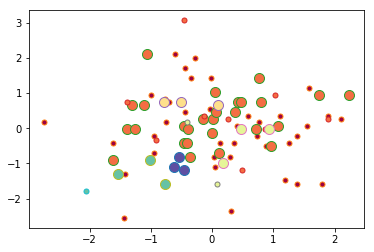

In [109]:
# identify core samples
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 
# print(core_samples)

# declare number of clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# plot our clusters
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)